In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
df=sns.load_dataset('titanic')

In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
df.shape

(891, 15)

In [8]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [9]:
df.shape

(891, 15)

In [ ]:
## Handling Missing Values.
# MEAN VALUE IMPUTATION.
# Handling missing values in 'age' column by filling with mean age.
df['Age_mean']=df['age'].fillna(df['age'].mean(), inplace=True)


C:\Users\Kirat\AppData\Local\Temp\ipykernel_5840\3389259864.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_mean']=df['age'].fillna(df['age'].mean(), inplace=True)


In [13]:
df[['age_mean','age']].head(10)

,age_mean,age
0,None,22.000000
1,None,38.000000
2,None,26.000000
3,None,35.000000
4,None,35.000000
5,None,29.699118
6,None,54.000000
7,None,2.000000
8,None,27.000000
9,None,14.000000


In [ ]:
#mean imputaon works well when we have normaly distributed data


In [14]:
### MEDAIN VALUE IMPUTATION
# if we have outliers in tha dataset.
# Handling missing values in 'age' column by filling with median age.
df['age_median']=df['age'].fillna(df['age'].median())

In [15]:
df[['age_median','age']]

,age_median,age
0,22.000000,22.000000
1,38.000000,38.000000
2,26.000000,26.000000
3,35.000000,35.000000
4,35.000000,35.000000
...,...,...
886,27.000000,27.000000
887,19.000000,19.000000
888,29.699118,29.699118
889,26.000000,26.000000


In [17]:
## mode imputauion
# used with categorical value.
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_mean,age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,None,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,None,62.0


In [18]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [23]:
mode_value=df[df['embarked'].notna()]['embarked'].mode()[0]

In [24]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [26]:
df[['embarked','embarked_mode']]

,embarked,embarked_mode
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [27]:
df['embarked'].isnull().sum()

np.int64(2)

SMOTE

In [28]:
from sklearn.datasets import make_classification

In [31]:
X,y=make_classification(n_redundant=0,n_samples=1000, n_features=2, n_clusters_per_class=1,weights=[0.9], random_state=12)

In [33]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [34]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

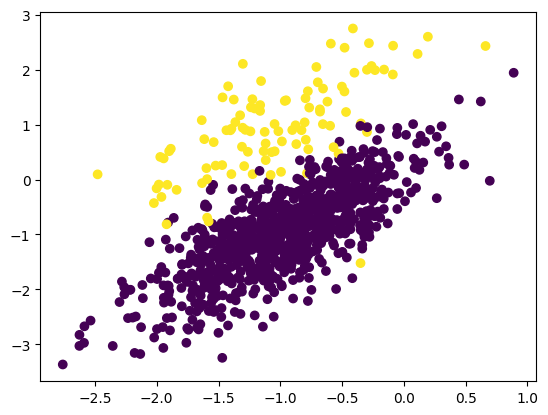

In [35]:
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [36]:
!pip install imblearn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from imblearn.over_sampling import SMOTE

In [38]:
#transform the dataset
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [41]:
X.shape

(1800, 2)

In [42]:
y.shape

(1800,)

In [46]:
len(y[y==0])

900

In [47]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)


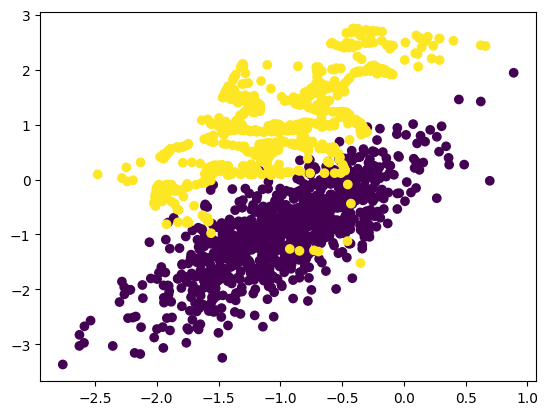

In [48]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

5 number summary Boxplot

In [ ]:
#min, #max, #median, #Q1, #Q3
# 5 number summary Boxplot


In [49]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]
minimum,q1,median,q3,max=np.quantile(lst_marks,[0,0.25,0.50,0.75,1])

In [55]:
minimum, q1, median, q3, max

(np.float64(32.0),
 np.float64(54.0),
 np.float64(67.0),
 np.float64(89.0),
 np.float64(99.0))

In [58]:
IQR=q3-q1

In [59]:
print("Interquartile Range is:", IQR)

Interquartile Range is: 35.0


In [60]:
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [62]:
lower_fence

np.float64(1.5)

In [ ]:

upper_fence

np.float64(141.5)

In [63]:
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74]


<Axes: >

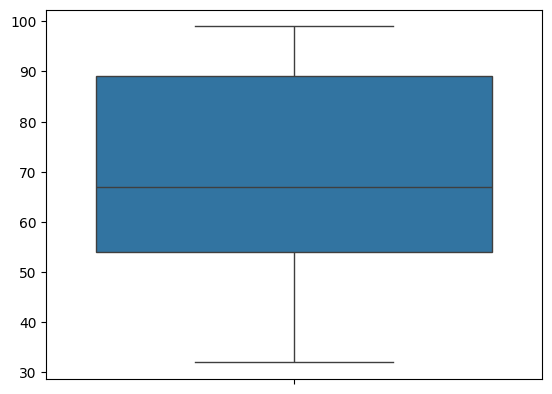

In [64]:
sns.boxplot(lst_marks)

In [67]:
lst_marks=[-100,-200,45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,190,150]


<Axes: >

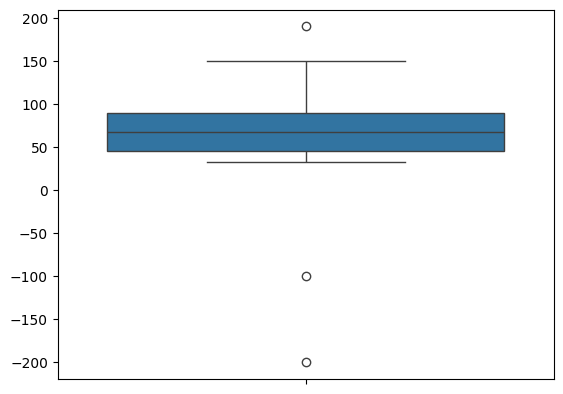

In [68]:
sns.boxplot(lst_marks)

DATA ENCODING 

NOMINAL/HOT ENCODING

ONE HOT ENCODING

LABEL ENCODING
 

In [69]:
# convert the categorical featutre into the meaningful values
from sklearn.preprocessing import OneHotEncoder

In [70]:
df=pd.DataFrame({'color':['red','blue','green','yellow','red','green','blue']
})

In [72]:
df.head()

,color
0,red
1,blue
2,green
3,yellow
4,red


In [73]:
encodes=OneHotEncoder()


In [77]:
#perform fit and transform
encoded_data=encodes.fit_transform(df[['color']]).toarray()

In [78]:
encoded_data

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [79]:
encoded_data_df=pd.DataFrame(encoded_data,columns=encodes.get_feature_names_out(['color']))

In [80]:
encoded_data_df

,color_blue,color_green,color_red,color_yellow
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0


In [82]:
# for any new feature
encodes.transform([['blue']]).toarray()

C:\Users\Kirat\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0., 0.]])

In [83]:
pd.concat([df,encoded_data_df],axis=1)

,color,color_blue,color_green,color_red,color_yellow
0,red,0.0,0.0,1.0,0.0
1,blue,1.0,0.0,0.0,0.0
2,green,0.0,1.0,0.0,0.0
3,yellow,0.0,0.0,0.0,1.0
4,red,0.0,0.0,1.0,0.0
5,green,0.0,1.0,0.0,0.0
6,blue,1.0,0.0,0.0,0.0


In [84]:
import pandas as pd

data = {
    'Age': [23, 45, 30, 50, 28, 35],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female'],
    'City': ['Delhi', 'Mumbai', 'Delhi', 'Chennai', 'Mumbai', 'Chennai'],
    'Purchased': [0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
df


,Age,Gender,City,Purchased
0,23,Male,Delhi,0
1,45,Female,Mumbai,1
2,30,Female,Delhi,0
3,50,Male,Chennai,1
4,28,Male,Mumbai,0
5,35,Female,Chennai,1


In [ ]:
encoder=OneHotEncoder(sparse=False)


In [93]:
encoded=encoder.fit_transform(df[['Gender','City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Gender','City']))



TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'